# Исследование мирового рынка игр. 

Игровая индустрия по всему миру неоднородна. Успешность отдельно взятой игры может зависеть от региона распространения, платформы реализации и даже от возрастного рейтинга. Проанализируем данные из открытых источников, чтобы вложить инвестиции в разработку нужного клиентам продукта.

### Цель исследования: 
На основании имеющихся данных найти закономерности, влияющие на успешную продажу игр, а также составить прогноз по наиболее популярным платформам и жанрам игр на 2017 год.

### Описание данных: 
Перед нами данные до 2016 года. Они представляют собой исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

### План работ:
1. Проверим корректность данных, заполним пропущенные значения. 
2. Выполним необходимые для анализа рассчеты, например, общие продажи по всему миру. 
3. Найдем самые популярные платформы, срок жизни платформ, а также самые популярные жанры и рейтинги игр.
4. Проверим, влияют ли оценки критиков и пользователей на продаваемость игр. 
5. Сформулируем и проверим на выборках гипотезы, которые помогут сформулировать итоговые выводы.

## Предобработка данных

In [1]:
import pandas as pd 
import numpy as np
import matplotlib as plt 
import seaborn as sns
from scipy import stats as st

In [2]:
games = pd.read_csv('/datasets/games.csv')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Из данных видно, что фрейм имеет 16715 записей. 
Для дальнейшего удобства переименуем колонки.
В колонках: 
`Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating` не хватает данных. Изучим их подробнее.


In [3]:
games.columns = (['name'
                  , 'platform'
                  , 'year_of_release'
                  , 'genre'
                  , 'na_sales'
                  , 'eu_sales'
                  , 'jp_sales'
                  , 'other_sales'
                  , 'critic_score'
                  , 'user_score'
                  , 'rating'                  
                 ])
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games[games['name'].isna()==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


По данным строкам не заполнены практически все колонки. Удалим их. 

In [5]:
index = games[games['name'].isna()==True].index
games = games.drop(index = index)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [6]:
games['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Данные по платформам выглядят корректно. 

In [7]:
games['year_of_release'].isna().sum()

269

По 269 строкам не заполнен год выпуска, возможно, год заполнен по другим платформам этой же игры. Попроуем выполнить поиск по колонке `name` и заполнить медианным значением. 

In [8]:
indexes = games[games['year_of_release'].isna() == True].index

years_of_releases = []
for index in indexes:
    name = games.loc[index,'name']
    year_of_release = games.query('name == @name')['year_of_release'].median()
    games.loc[index, 'year_of_release'] = year_of_release

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

In [9]:
games['year_of_release'].isna().sum()

146

Уменьшили количетсво пропусков до 146. Сейчас строки с пропусками составляют приблизительно 1.5% от общего количества записей. Большая часть записей была выпущена только на одной платформе. 
Заполним оставшиеся пропуски значением медианного года выпуска по платформе релиза. Так как популярность каждой платформы строго ограничена временными рамками в виду выхода новых поколений. 

In [10]:
indexes = games[games['year_of_release'].isna() == True].index

games = games.drop(index = indexes)

In [11]:
games['year_of_release'].isna().sum()

0

Иследуем данные в колнке `genre`

In [12]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       9934 non-null   object 
 10  rating           9868 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [13]:
games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Всего 12 жанров, нет дублей. Категориальная колонка выглядит корректно. 

Исследуем данные колонок `na_sales`, `eu_sales`, `jp_sales` 

count    16567.000000
mean         0.263975
std          0.816474
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

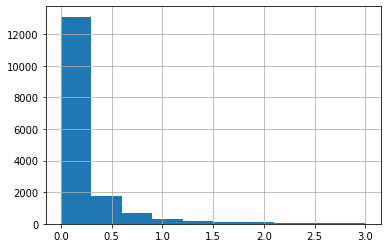

In [14]:
games['na_sales'].hist(range = (0,3))
games['na_sales'].describe()

В Северной Америке большая часть игр продана в количестве экземпляров менее 0.5 млн, при этом есть аномальные значения продаж более 5 млн копий. Максимальное значение 41,36 млн проданных копий. 

count    16567.000000
mean         0.145814
std          0.505364
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

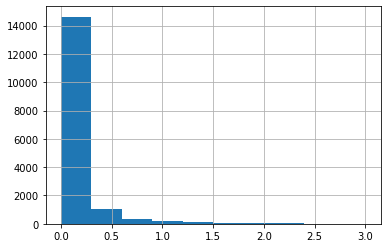

In [15]:
games['eu_sales'].hist(range = (0,3))
games['eu_sales'].describe()

В Европе ситуация аналогичная Северной Америке. Большая часть значений лежит в пределах 0.5 млн проданных копий. Максимаольное значение 28,9 млн проданных копий.  

count    16567.000000
mean         0.078020
std          0.310068
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

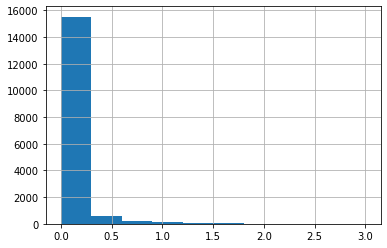

In [16]:
games['jp_sales'].hist(range = (0,3))
games['jp_sales'].describe()

В Японии также, как и в других регионах большая часть значений лежит в пределах 0.5 млн проданных копий. Отметим, что 50% выпущенных игр были проданы в количестве, меньшем, чем 0,01 млн проданных копий. Максимальное количество проданных копий составляет 10,22 млн.

count    16567.000000
mean         0.047567
std          0.187476
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

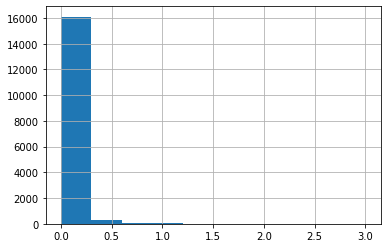

In [17]:
games['other_sales'].hist(range = (0,3))
games['other_sales'].describe()

Картина продаж игр в остальном мире (за исключением Японии, Северной Америки и Европы) соответствует трендам, большая часть значений в пределах 0,5 млн копий. 50% значений проданы менее чем 0,01 млн раз. Максимальное количество проданных копий - 10,22 млн. 

In [18]:
games.query('jp_sales == 0 & eu_sales == 0 & na_sales == 0 & other_sales == 0').index

Int64Index([16676, 16709], dtype='int64')

Видим две строки, которые купили в количестве копий < 100 000 экземпляров в каждом из возможных регионов, при этом колонки рейтингов также не заполнены. Удалим эти строки. 

In [19]:
indexes = games.query('jp_sales == 0 & eu_sales == 0 & na_sales == 0 & other_sales == 0').index
games = games.drop(index = indexes)

Исследуем колонки `critic_score`, `user_score`, `rating`

8490


count    8075.000000
mean       68.991950
std        13.923383
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

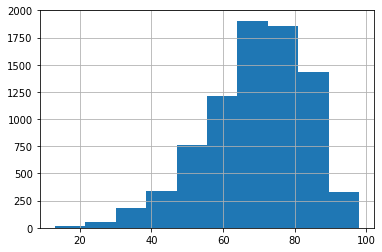

In [20]:
print(games['critic_score'].isna().sum())
games['critic_score'].hist()
games['critic_score'].describe()

Данные на гистограмме скошены вправо. Также, видим, что более 8 000 записей в таблице не имеют оценки критика. Попробуем найти оценку критика по аналогичным играм на других платформах. 

Варианты заполнения оставшихся данных: 
1. Как количетсвенную колонку заполнить медианными значениями, не подверженными выбросам. 
2. Проверить, равны ли оценки критиков, оценкам клиентов и заполнить пропущенные значения клиентскими оценками. 
3. Оставить игры, не оцененные критиками без оценок, далее проверить корреляцию между оценкой и продажами и, если она есть, то выполнить действия по п.1 или п.2
Исследуем колонку `user_score`

In [21]:
games['user_score'].value_counts()

tbd    2394
7.8     324
8       288
8.2     279
8.3     253
       ... 
0.2       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Заменим значения tbd на 0 и изменим тип колонки.

In [22]:
games.query('user_score == "tbd"')

def score_changer(score):
    if score == 'tbd':
        return 
    return score

games['user_score'] = games['user_score'].apply(score_changer)

In [23]:
games['user_score'] = games['user_score'].astype('float')
games['user_score'].value_counts()

7.8    324
8.0    288
8.2    279
8.3    253
8.5    252
      ... 
2.3      2
0.7      2
1.1      2
9.7      1
0.0      1
Name: user_score, Length: 95, dtype: int64

Посмотрим, насколько совпадают оценки критиков и покупателей.

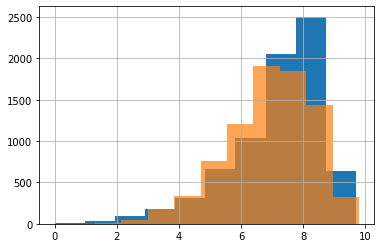

In [24]:
games['user_score'].hist()
(games['critic_score']/10).hist(alpha = 0.7)
plt.pyplot.show()

Оценки критиков ниже оценок пользователей. 
Оставим пока что пропуски без заполнения и проверим ниже, есть ли корреляция между количеством проданных копий и рейтингом игры. Если корреляция будет отсутствовать, то оставим строки незаполненными и учтем это при проверке гипотез. 

In [25]:
(games['user_score'].round(0) == (games['critic_score']/10).round(0)).sum()

2447

Исследуем колонку rating

In [26]:
games['rating'].value_counts()

E       3958
T       2930
M       1554
E10+    1412
EC         8
K-A        3
RP         2
AO         1
Name: rating, dtype: int64

In [27]:
games['rating'].isna().sum()

6697

In [28]:
games['rating'] = games['rating'].fillna('underfined')
games['rating'].isna().sum()

0

Приведем колонку `year_of_release` к типу `int`

In [29]:
games['year_of_release'] = games['year_of_release'].astype('int') 

In [30]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16565 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16565 non-null  object 
 1   platform         16565 non-null  object 
 2   year_of_release  16565 non-null  int64  
 3   genre            16565 non-null  object 
 4   na_sales         16565 non-null  float64
 5   eu_sales         16565 non-null  float64
 6   jp_sales         16565 non-null  float64
 7   other_sales      16565 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           16565 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


# Анализ данных

Создадим отдельную колонку с сумарными продажами игр по всем регионам

In [31]:
games['sales_total'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games['sales_total']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: sales_total, Length: 16565, dtype: float64

<AxesSubplot:title={'center':'Количетсво проданных копий игр по годам'}, xlabel='year_of_release'>

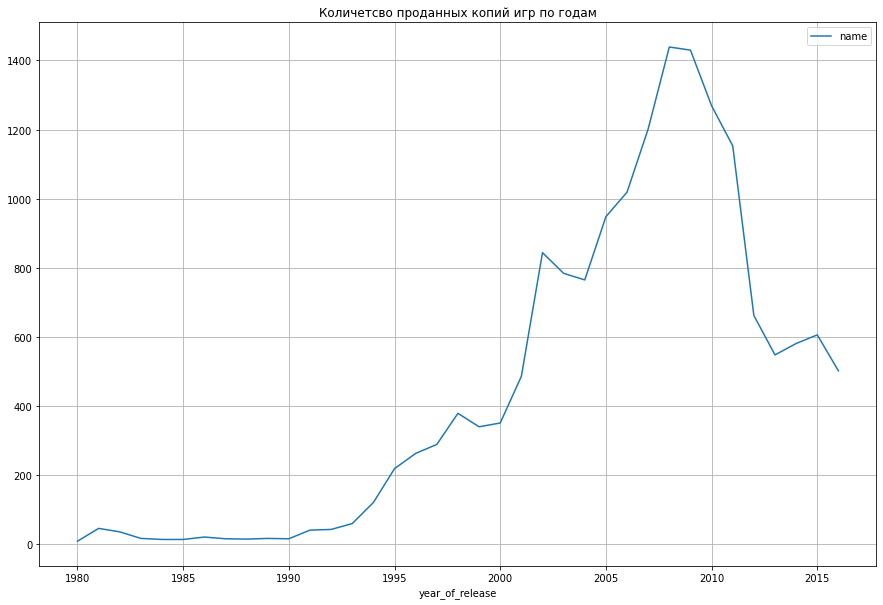

In [32]:
(games
     .pivot_table(index = 'year_of_release',values = 'name', aggfunc = 'count')
     .plot(figsize = (15,10), grid = True, title ='Количетсво проданных копий игр по годам')
)

Количество выпущенных игр росло с 80-х годов достигнув пика в 2008 году, далее заметен тренд на падение. 
До 1994 года выпускалось менее ста игр в год и, как следствие, в это время могли быть другие метрики, влияющие на популярность игры, поэтому для дальнейшего исследования будем использовать данные, начиная с 1994 года. 

In [33]:
games = games.query('year_of_release>=1994')

Исследуем данные продаж по платформам. Также исследуем срок жизни платформы и наиболее популярные платформы на момент выгрузки датафрейма.

<AxesSubplot:title={'center':'Общее количество продаж по платформам'}, xlabel='platform'>

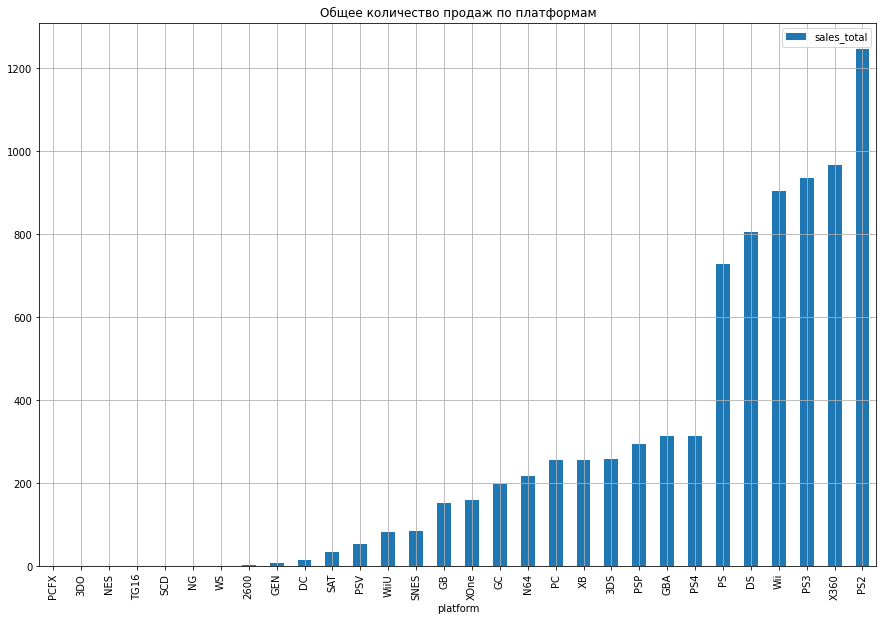

In [34]:
(games
 .pivot_table(index = 'platform', values='sales_total', aggfunc='sum')
 .sort_values(by = 'sales_total')
 .plot(kind = 'bar', figsize = (15,10), grid = True, title = 'Общее количество продаж по платформам')
)

count    30.000000
mean      6.200000
std       5.294109
min       0.000000
25%       2.000000
50%       5.500000
75%       9.750000
max      22.000000
Name: total, dtype: float64

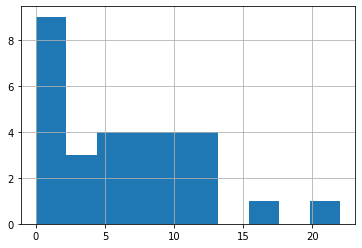

In [35]:
yers_of_life = (games
 .pivot_table(index = 'platform', values = 'year_of_release', aggfunc = ['min', 'max'])
 .reset_index()
 .rename(columns = {'name':'num'})
)
yers_of_life['total'] = yers_of_life['max'] - yers_of_life['min']  
yers_of_life['total'].hist()
yers_of_life['total'].describe()

Исследуем продажи по топ платформам в разрезе годов.

Text(0.5, 1.0, 'Срок жизни платформ')

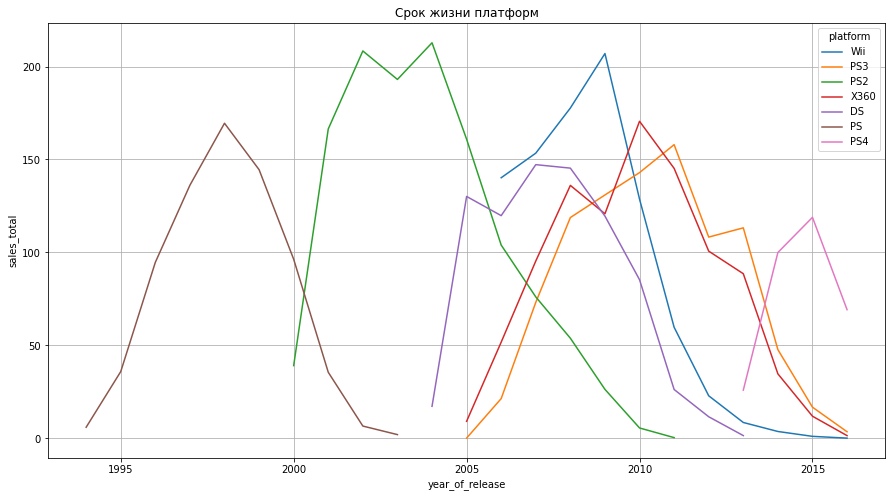

In [36]:
top_platforms = (games
 .pivot_table(index = 'platform', values='sales_total', aggfunc='sum')
 .reset_index()
 .sort_values(by = 'sales_total')
 .tail(7)
)

platform_by_years = (games.query('platform in @top_platforms.platform')
 .pivot_table(index = ['platform', 'year_of_release'], values='sales_total', aggfunc='sum')
 .sort_values(by = 'sales_total')
 .reset_index()
                  
)
plt.pyplot.figure(figsize=(15,8))

sns.lineplot(x="year_of_release", y="sales_total",
             hue="platform",
             data=platform_by_years)
plt.pyplot.grid()
plt.pyplot.title('Срок жизни платформ')

Из графика видно, что жизненный цикл топ-платформ составляет 5 лет и в течение следующих 3-5 лет продажи по платформе приходят к 0. Также, заметен негативный тренд по количеству проданных копий игр по всем платформам. Для дальнейшего анализа и построения прогнозов на 2017 год возьмем данные, начиная с 2013 года. 

In [37]:
games_actual = games.query('year_of_release>=2013')

Определим, какие платформы лидируют по продажам.

In [38]:
(games_actual
 .pivot_table(index = 'platform', values = 'sales_total', aggfunc = 'sum')
 .sort_values('sales_total', ascending = False)
)

,sales_total
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,40.06
PSV,32.99
Wii,13.66


Посмотрим, как менялись продажи по годам. 

Text(0.5, 1.0, 'Количество продаж по платформам с 2013г')

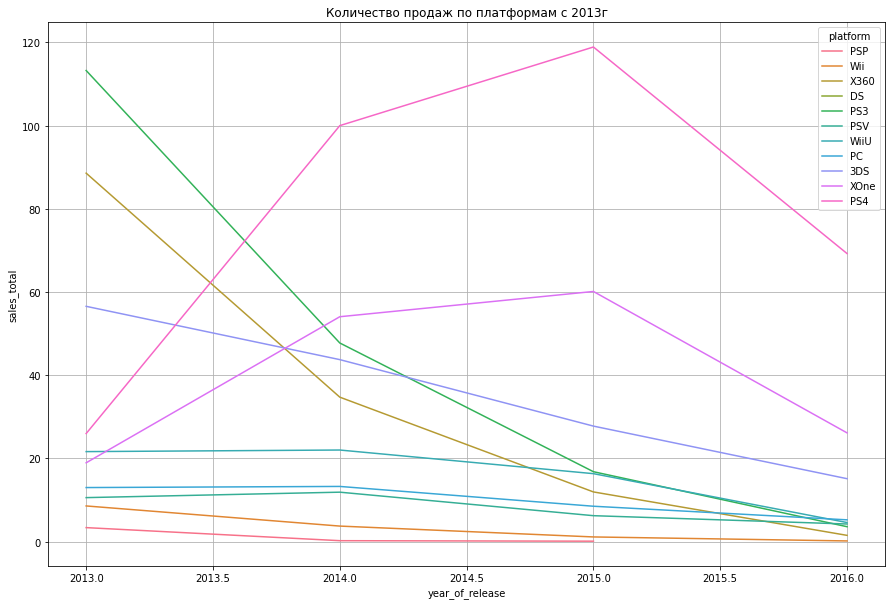

In [39]:
actual_trends = (games_actual
 .pivot_table(index = ['platform', 'year_of_release'], values='sales_total', aggfunc='sum')
 .sort_values(by = 'sales_total')
 .reset_index()
                  
)
plt.pyplot.figure(figsize=(15,10))
sns.lineplot(x="year_of_release", y="sales_total",
             hue="platform",
             data=actual_trends
            )
plt.pyplot.grid()
plt.pyplot.title('Количество продаж по платформам с 2013г')

Наиболее интересные платформы, исходя из графика
1. PS4 - не смотря на падение, остается одним из глобальных лидеров.
2. XOne - не смотря на падение, остается одним из глобальных лидеров.
3. 3ds - не смотря на падение, остается одним из глобальных лидеров.
4. PC - имеет стабильные продажи год к году. 
5. PSV - имеет стабильные продажи год к году.
6. WiiU - после падения в 10-е, имеет стабильные продажи последние несколько лет. 
</p>Построим по ним график "Ящик с усами"

<AxesSubplot:title={'center':'Распределение продаж по платформам'}>

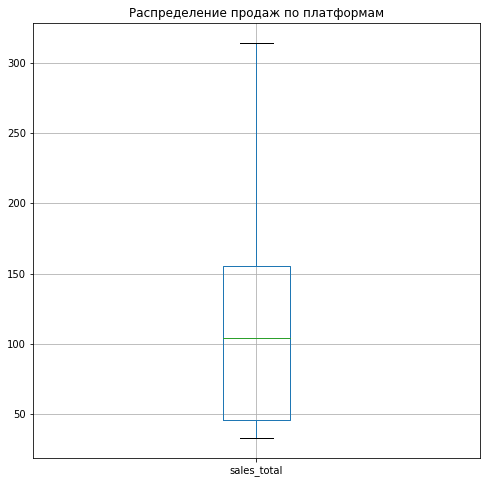

In [40]:
games_actual = games_actual.query('platform == "PS4" or platform == "XOne" or platform == "3DS" or platform == "PC" or platform == "PSV" or platform == "WiiU"')
(games_actual
 .pivot_table(index = 'platform', values = 'sales_total', aggfunc = 'sum')
 .sort_values('sales_total', ascending = False)
 .plot(kind = 'box', grid = True, figsize = (8,8), title = 'Распределение продаж по платформам')
)

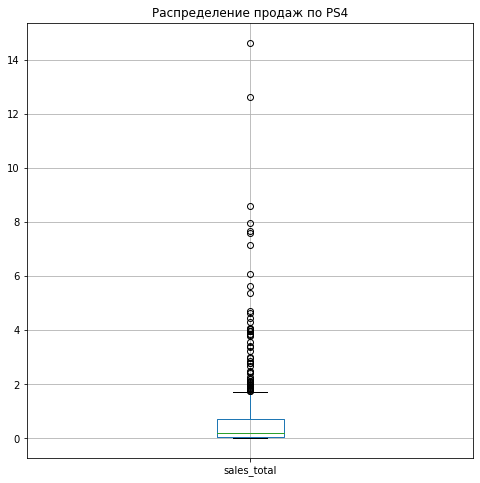

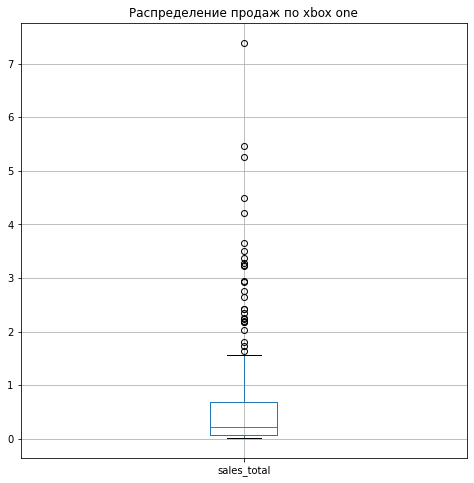

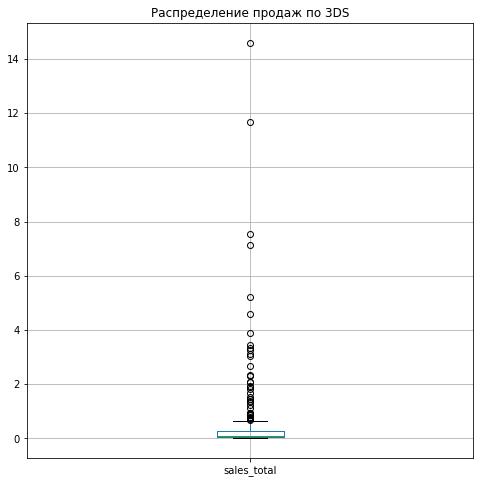

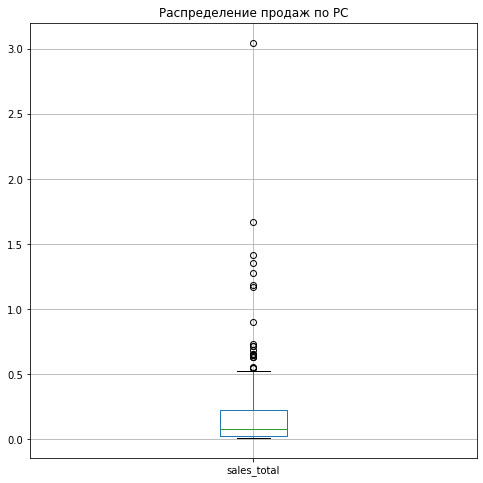

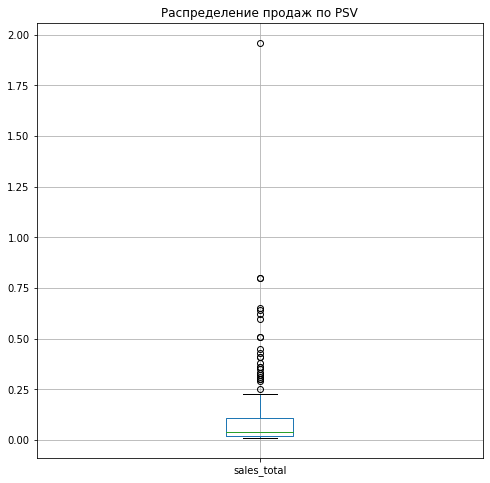

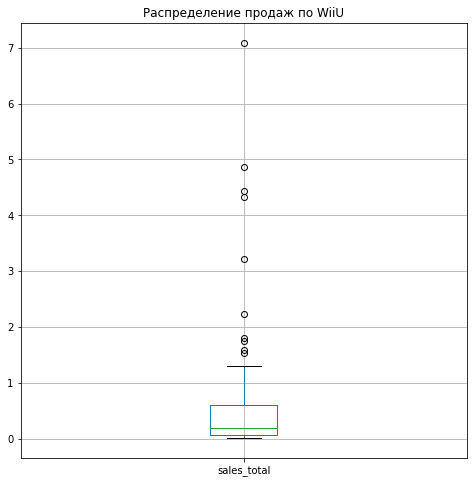

In [41]:
games_actual.query('platform == "PS4"')['sales_total'].plot(kind = 'box', grid = True, figsize = (8,8), title = 'Распределение продаж по PS4')
plt.pyplot.show()
games_actual.query('platform == "XOne"')['sales_total'].plot(kind = 'box', grid = True, figsize = (8,8), title = 'Распределение продаж по xbox one')
plt.pyplot.show()
games_actual.query('platform == "3DS"')['sales_total'].plot(kind = 'box', grid = True, figsize = (8,8), title = 'Распределение продаж по 3DS')
plt.pyplot.show()
games_actual.query('platform == "PC"')['sales_total'].plot(kind = 'box', grid = True, figsize = (8,8), title = 'Распределение продаж по PC')
plt.pyplot.show()
games_actual.query('platform == "PSV"')['sales_total'].plot(kind = 'box', grid = True, figsize = (8,8), title = 'Распределение продаж по PSV')
plt.pyplot.show()
games_actual.query('platform == "WiiU"')['sales_total'].plot(kind = 'box', grid = True, figsize = (8,8), title = 'Распределение продаж по WiiU')
plt.pyplot.show()




По каждой популярной платформе третий квартиль располагается от 0,1 до 0,5 млн проданных копий. При этом по каждой платформе заметны выбросы, это игры, которые стали аномально популярными во всем мире. 

In [42]:
games_actual.platform.value_counts()

PS4     392
PSV     358
3DS     303
XOne    247
PC      192
WiiU    115
Name: platform, dtype: int64

Проверим на примере ps4 влияние отзывов на количество продаж. 

,sales_total,critic_score,user_score
sales_total,1.000000,0.405895,-0.033625
critic_score,0.405895,1.000000,0.557654
user_score,-0.033625,0.557654,1.000000


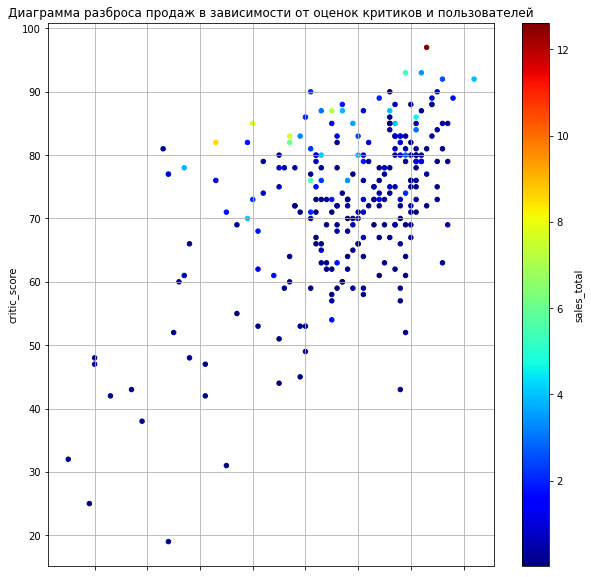

In [43]:
ps4_games = games_actual.query('platform == "PS4" and user_score > 0 and critic_score > 0')
ps4_games.plot.scatter(x = 'user_score', y = ('critic_score'), grid = True, figsize = (10,10), colormap='jet',c='sales_total', alpha = 2, title ='Диаграмма разброса продаж в зависимости от оценок критиков и пользователей')
ps4_games[['sales_total', 'critic_score', 'user_score']].corr()




In [44]:
xone_games = games_actual.query('platform == "XOne" and user_score > 0 and critic_score > 0')
xone_games[['sales_total', 'critic_score', 'user_score']].corr()

,sales_total,critic_score,user_score
sales_total,1.000000,0.410422,-0.094003
critic_score,0.410422,1.000000,0.472462
user_score,-0.094003,0.472462,1.000000


In [45]:
pc_games = games_actual.query('platform == "PC" and user_score > 0 and critic_score > 0')
pc_games[['sales_total', 'critic_score', 'user_score']].corr()

,sales_total,critic_score,user_score
sales_total,1.000000,0.197790,-0.105228
critic_score,0.197790,1.000000,0.432737
user_score,-0.105228,0.432737,1.000000


Заметна слабая корреляция между оценкой критика и количеством продаж. Оценка клиентов не коррелирует с итоговой ценой. 

<AxesSubplot:title={'center':'Прибыльность игр по жанрам'}, xlabel='genre'>

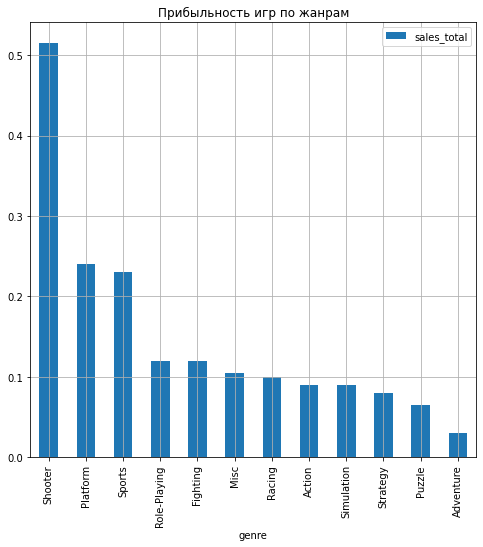

In [46]:
(games_actual
 .pivot_table(index = 'genre', values = 'sales_total', aggfunc = 'median')
 .sort_values('sales_total', ascending = False)
 .plot(kind = 'bar', figsize = (8,8), grid = True, title = 'Прибыльность игр по жанрам')
)

Шутеры - лидеры продаж, далее по прибыльности следуют спортивные и платформенные игры. Стратегии, пазлы и приключения - наоборот, практически не продаются. 

<AxesSubplot:title={'center':'Прибыльность игр по рейтингам'}, xlabel='rating'>

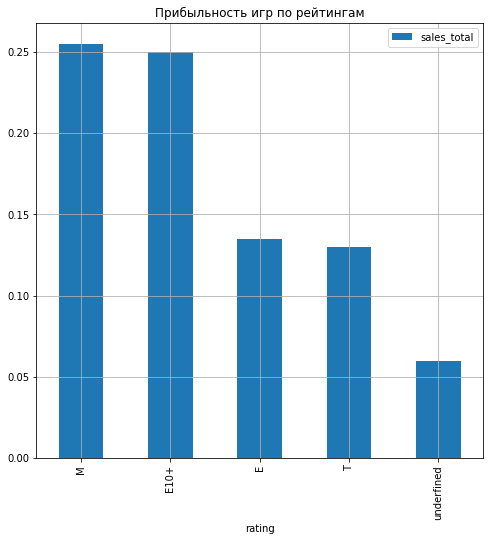

In [47]:
(games_actual
 .pivot_table(index = 'rating', values = 'sales_total', aggfunc = 'median')
 .sort_values('sales_total', ascending = False)
 .plot(kind = 'bar', figsize = (8,8), grid = True, title = 'Прибыльность игр по рейтингам')
)

Наиболее прибыльные игры с возрастными ограничениями -  М и e10+

## Исследование региональных особенностей клиентов.

In [48]:
games_actual['na_sales'].describe()

count    1607.000000
mean        0.177660
std         0.475405
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.030000
Name: na_sales, dtype: float64

<AxesSubplot:title={'center':'Популярные платформы по странам мира'}, xlabel='platform'>

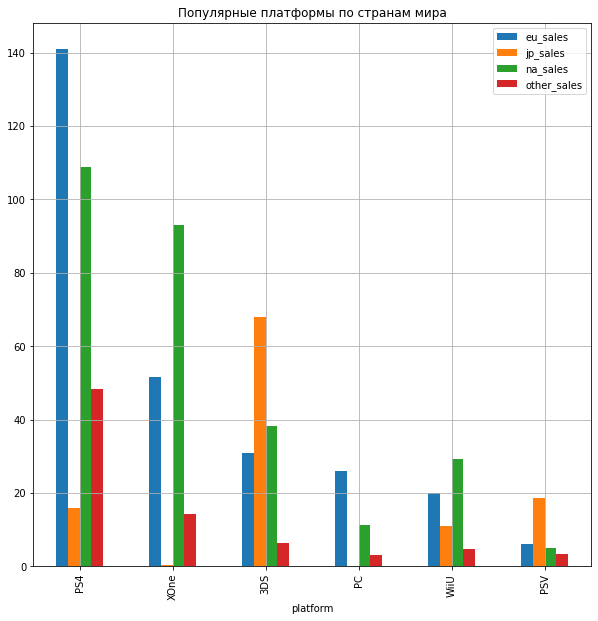

In [49]:
(games_actual
 .pivot_table(index = 'platform', values = ['eu_sales', 'na_sales', 'jp_sales', 'other_sales'], aggfunc = 'sum')
 .sort_values('eu_sales', ascending = False)
 .plot(kind = 'bar', grid = True, figsize = (10,10), title = 'Популярные платформы по странам мира')
)

В Европе и остальном мире наибольшей популярностью пользуются платформы от компании Sony - ps4. 
В Северной Америке на равне с ps4 самой популярной консолью является XOne.  
В Японии самой популярной платформой является 3ds

Исследуем наиболее популярные жанры по странам мира.

<AxesSubplot:title={'center':'Популярные жанры по странам мира'}, xlabel='genre'>

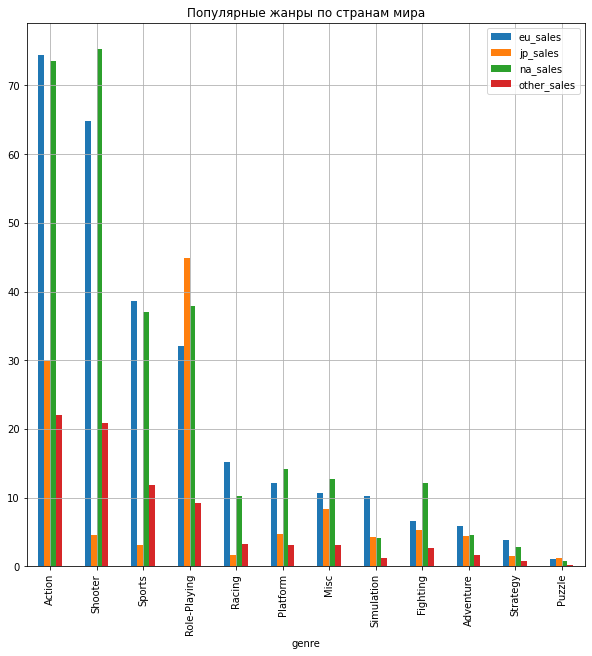

In [50]:
(games_actual
 .pivot_table(index = 'genre', values = ['eu_sales', 'na_sales', 'jp_sales', 'other_sales'], aggfunc = 'sum')
 .sort_values('eu_sales', ascending = False)
 .plot(kind = 'bar', grid = True, figsize = (10,10), title = 'Популярные жанры по странам мира')
)

В Японии - наиболее популярный жанр - role-playing. 
В остальном мире распределение похоже на общее, экшн - шутер - спортивные игры.

Оценим влияние рейтинга на продажи по регионам.

<AxesSubplot:title={'center':'Популярные рейтинги по странам мира'}, xlabel='rating'>

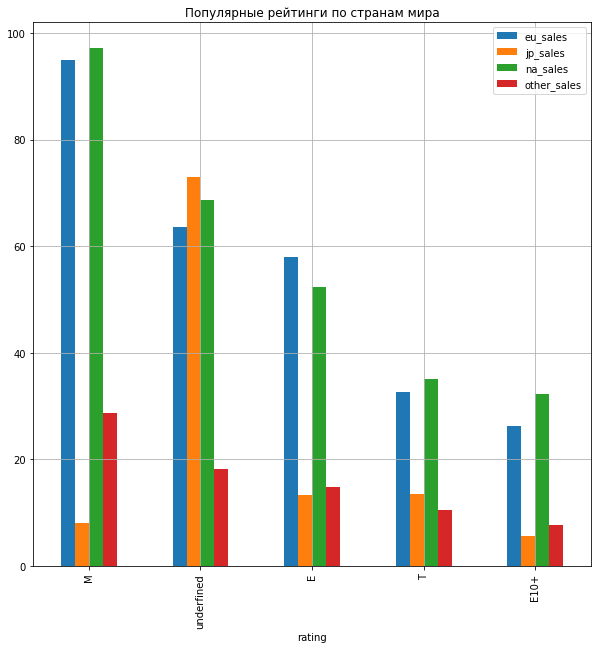

In [51]:
(games_actual
 .pivot_table(index = 'rating', values = ['eu_sales', 'na_sales', 'jp_sales', 'other_sales'], aggfunc = 'sum')
 .sort_values('eu_sales', ascending = False)
 .plot(kind = 'bar', grid = True, figsize = (10,10), title = 'Популярные рейтинги по странам мира')
)

<div class="alert alert-info"> <b>Комментарий студента:</b> Добавил! </div>

В Европе, Северной Америке и остальном мире самым популярным рейтингом является "M". 
В Японии самыем популярные игры без рейтинга

<div class="alert alert-info"> <b>Комментарий студента:</b> Обновил</div>

## Проверка гипотез

Гипотеза 1.
</p> Нулевая гипотеза - Средний пользовательский рейтинг платформ XBox One и PC - одинаковые. 
</p> Альтернативная гипотеза - Средний пользовательский рейтинг платформ XBox One и PC - отличаются.

In [52]:
xbox_ratings = games_actual.query('platform == "XOne" and user_score>0')['user_score']
pc_ratings = games_actual.query('platform == "PC" and user_score>0')['user_score']

alpha = 0.01

results = st.ttest_ind(xbox_ratings, pc_ratings, equal_var = True)
print (results.pvalue)
if results.pvalue < alpha:
    print ('отвергаем нулевую гипотезу')
else:
    print ('не получилось отвергнуть нулевую гипотезу')

0.15503167687396294
не получилось отвергнуть нулевую гипотезу


Вывод: на основании представленных данных можно сделать обоснованное предположение, что пользователи одинаково оценивают игры, разработанные на платформах PC и Xbox One

Гипотеза 2.
</p> Нулевая гипотеза - Средний пользовательский рейтинг жанров action и sports - одинаковые. 
</p> Альтернативная гипотеза - Средний пользовательский рейтинг жанров action и sports - отличаются.

In [53]:
sports_games = games_actual.query('genre == "Sports" and user_score > 0')['user_score']
action_games = games_actual.query('genre == "Action" and user_score > 0')['user_score']

alpha = 0.01

results = st.ttest_ind(sports_games, action_games, equal_var = False)
print (results.pvalue)

if results.pvalue<alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

1.2481210261397359e-11
Отвергаем нулевую гипотезу


In [54]:
print ('Медианная оценка по спортивным играм:', sports_games.median())
print ('Медианная оценка по играм в жанре экшн:', action_games.median())

Медианная оценка по спортивным играм: 5.8
Медианная оценка по играм в жанре экшн: 7.1


На основании выборок генеральных совокупностей можем сделать предположение, что пользователи оценивают игры жанра action выше, чем жарна sports

## Выводы

В рамках предобработки данных были выявлены пропуски в колонках `user_score`, `critic_score`, `rating`. По части пропусков была выполнена замена соответсвующим значением аналогичной игры на другую платформу. Другая часть пропусков колонки `rating` была заполнена самым частым значением для данного жанра. Часть пропусков в колонках `user_score` и `critic_score` были оставлены незаполненными, так как в рамках исследования было выявлено отсутствие кореляции между продаваемостью игры и наличием оценок. 

На основании данных можно сдлелать вывод, что игровая индустрия имеет негативный тренд по количеству проданных копий игр и по количеству релизнутых игр.
Наиболее перспективными площадками на 2017 год являются: 
1. ps4 - лидер мирового рынка. 
2. xbox one - один из лидеров мирового рынка и Северной Америки. 
3. pc - за счет стабильных продаж по всему миру. 
4. 3ds - за счет популярности в Японии.
</p>Также, делаем вывод, что пользовательские оценки не влияют на уровень продаваемости игр, оценки критиков влияют незначительно. 
</p>Более важным критерием является жанр и платформа потенциальнго продукта, которые в свою очередь зависият от региональных предпочтений. 
Если ориентировать продукт в Японию, то платформа - ps4/3ds, жанр role playing. 
Если ориентировать продукт в Остальной мир, то платформа ps4/xbox one/pc, жанр - Shooter, Platform или Sports. 